In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [2]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'header': 8}

In [3]:
df = pd.read_csv('../input/ICEFacilityListReport.csv.gz', **read_csv_opts)

In [4]:
df.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0%,0,0,0%,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0%,0,0,0%,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,9%,800,372,102%,"1,207",5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,02920,1,BOS,BOS,...,No,NaN,0,400,0%,0,0,0%,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0%,0,0,0%,0,0


In [5]:
df.columns

Index(['DETLOC', 'Name', 'Address', 'City', 'County', 'State', 'Zip',
       'Circuit', 'AOR', 'Docket',
       ...
       'DSM Assigned?', 'DSM Assignment Type', 'FY18 Calendar Days in Use',
       'FY18 Possible Days', 'FY18 % of Days in Use', 'FY18 Total Mandays',
       'FY17 Calendar Days in Use', 'FY17 % of Days in Use',
       'FY17 Total Mandays', 'FY17 Max Pop Count'],
      dtype='object', length=135)

In [6]:
levels_to_clean = ['ADP - Monthly',
          'ADP: Criminality',
          'ADP: Fiscal Year',
          'ADP: Initial Bookins',
          'Capacity',
          'FY18 ADP: Criminality and Gender',
          'FY18 ADP: Detainee Classification Level',
          'FY18 ADP: ICE Threat Level',
          'FY18 ADP: Mandatory Detention',
          'Facility Average Length of Stay',
          'Facility Bookins',
          'Facility Information',
          'Facility Statistics - FY 2017',
          'Facility Statistics - FY 2018',
          'Initial Bookins',
          'Population']

In [7]:
# # Need to check this doesn't cause issues, make smarter
# for level in levels_to_clean:
#     for col in df.loc[:, level]:
#         try:
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(str)
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace(',','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('$','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('%','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(int)
#         except ValueError:
#             pass

for col in df.columns:
    try:
        df.loc[:, col] = df.loc[:, col].astype(str)
        df.loc[:, col] = df.loc[:, col].str.replace(',','')
        df.loc[:, col] = df.loc[:, col].str.replace('$','')
        df.loc[:, col] = df.loc[:, col].str.replace('%','')
        df.loc[:, col] = df.loc[:, col].astype(int)
    except ValueError:
        pass

In [8]:
# adp = []

# for col in df.columns: adp.append('ADP' in col)

In [9]:
alos = ['FY18 ALOS',
        'FY17 ALOS',
        'FY16 ALOS',
        'FY15 ALOS']

In [29]:
df.loc[:,alos] = df.loc[:,alos].astype(float)

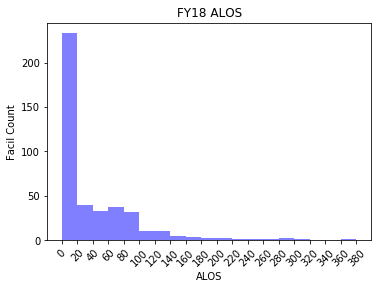

In [32]:
num_bins = np.arange(0,400,20)
data = df['FY18 ALOS']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('ALOS')
plt.xticks(np.arange(0, 400, step=20), rotation=45)
plt.ylabel('Facil Count')
# plt.yticks(np.arange(0, 300, step=50))
# plt.ylim(-5, 275)
plt.title('FY18 ALOS')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

In [30]:
df['FY18 ALOS'].min()

0.0

In [31]:
df['FY18 ALOS'].max()

400.0

In [36]:
alos.reverse()

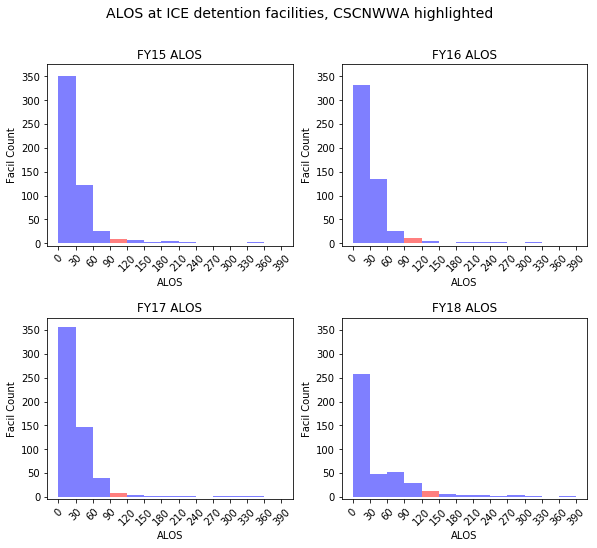

In [86]:
target_facil = 'CSCNWWA'

bin_min = 0
bin_max = 400
step = 30

num_bins = np.arange(bin_min, bin_max, step)

target_alos = df.set_index('DETLOC').loc[target_facil, alos]

target_bins = np.digitize(list(target_alos.values), list(bins))

fig = plt.figure(figsize=(10,8))
i = 0
for fy in alos:
    ax=plt.subplot(2,2,i+1)
    
    data = df.set_index('DETLOC')[fy]
    
    n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
    
    patches[target_bins[i]].set_fc('r')
 
    plt.xlabel('ALOS')
    plt.xticks(np.arange(bin_min, bin_max, step=step), rotation=45)
    plt.ylabel('Facil Count')
    plt.yticks(np.arange(0, 400, step=50))
    plt.ylim(-5, 375)
    plt.title(f'{fy}')

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15) 
    i = i + 1
    # plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.suptitle(f'ALOS at ICE detention facilities, {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()